# Avocado Prices

For this project, I'm working with the avocado prices dataset found on [kaggle](https://www.kaggle.com/neuromusic/avocado-prices/data). The dataset includes the average prices for avocados 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import missingno as mno

In [2]:
df = pd.read_csv('avocado.csv', index_col=0)

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.groupby('Date').count()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,108,108,108,108,108,108,108,108,108,108,108,108
2015-01-11,108,108,108,108,108,108,108,108,108,108,108,108
2015-01-18,108,108,108,108,108,108,108,108,108,108,108,108
2015-01-25,108,108,108,108,108,108,108,108,108,108,108,108
2015-02-01,108,108,108,108,108,108,108,108,108,108,108,108
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,108,108,108,108,108,108,108,108,108,108,108,108
2018-03-04,108,108,108,108,108,108,108,108,108,108,108,108
2018-03-11,108,108,108,108,108,108,108,108,108,108,108,108


In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date, dtype: datetime64[ns]

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df['region'].value_counts()

Plains                 338
NewYork                338
NewOrleansMobile       338
MiamiFtLauderdale      338
NorthernNewEngland     338
TotalUS                338
GreatLakes             338
Boise                  338
Albany                 338
SouthCarolina          338
Louisville             338
Detroit                338
Midsouth               338
BaltimoreWashington    338
Southeast              338
LosAngeles             338
Syracuse               338
LasVegas               338
CincinnatiDayton       338
Columbus               338
RichmondNorfolk        338
Atlanta                338
Sacramento             338
HartfordSpringfield    338
West                   338
Orlando                338
Denver                 338
SanFrancisco           338
Portland               338
PhoenixTucson          338
BuffaloRochester       338
StLouis                338
Seattle                338
Nashville              338
SanDiego               338
RaleighGreensboro      338
Charlotte              338
C

In [30]:
NorthernNE = df[df['region'] == 'NorthernNewEngland']
NorthernNE.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.21,304598.42,2601.32,250270.90,12123.24,39602.96,39602.96,0.0,0.0,conventional,2015,NorthernNewEngland
2015-12-20,1.17,284808.22,2616.13,232459.75,3820.83,45911.51,45911.51,0.0,0.0,conventional,2015,NorthernNewEngland
2015-12-13,0.95,407482.83,2970.12,369076.25,116.84,35319.62,35319.62,0.0,0.0,conventional,2015,NorthernNewEngland
2015-12-06,1.11,303058.29,3320.11,261503.41,94.18,38140.59,38140.59,0.0,0.0,conventional,2015,NorthernNewEngland
2015-11-29,1.25,219689.90,2897.91,181977.84,88.58,34725.57,34725.57,0.0,0.0,conventional,2015,NorthernNewEngland


In [31]:
NorthernNE = NorthernNE[['AveragePrice']]
NorthernNE.head()

,AveragePrice
Date,
2015-12-27,1.21
2015-12-20,1.17
2015-12-13,0.95
2015-12-06,1.11
2015-11-29,1.25


In [35]:
monthly_NE = NorthernNE.resample('MS')
monthly_NE_avg = monthly_NE.mean()
monthly_NE_avg.head()

,AveragePrice
Date,
2015-01-01,1.47250
2015-02-01,1.47375
2015-03-01,1.49200
2015-04-01,1.52875
2015-05-01,1.51000


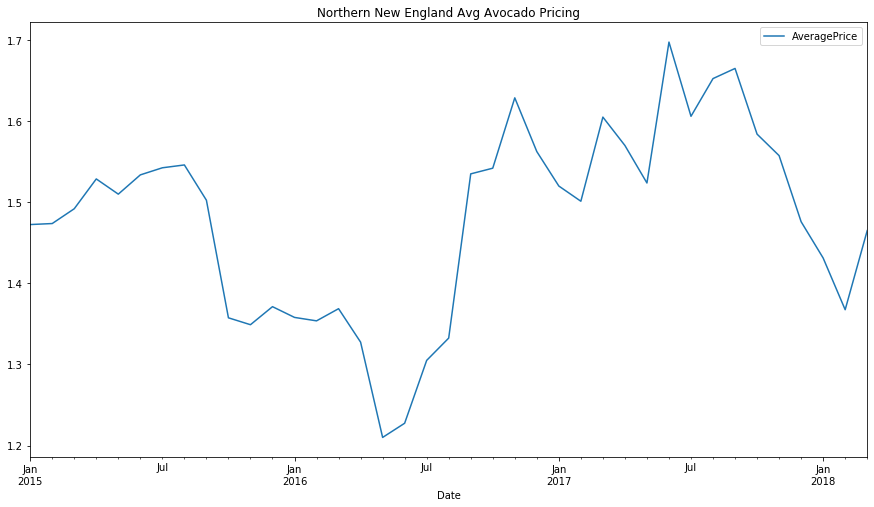

In [39]:
monthly_NE_avg.plot( figsize=(15, 8), title='Northern New England Avg Avocado Pricing');

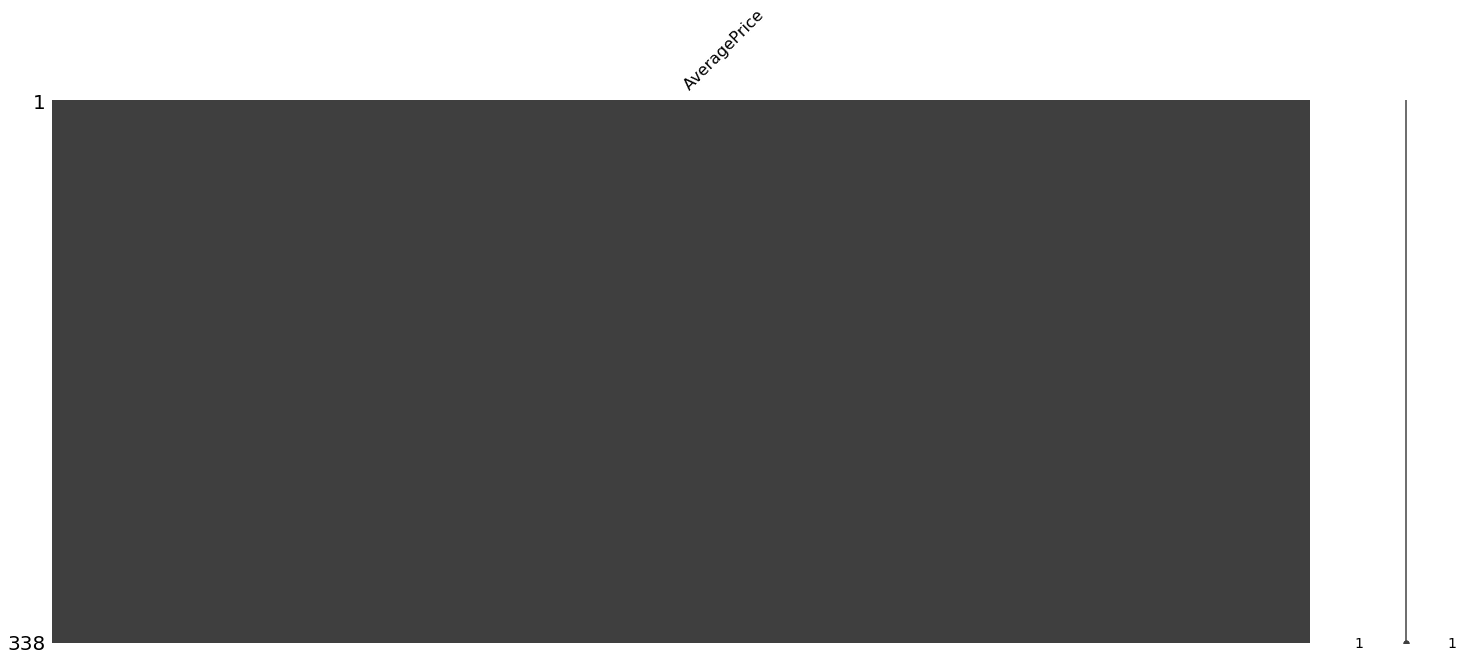

In [40]:
mno.matrix(NorthernNE);

In [42]:
PhoenixTucson = df[df['region'] == 'PhoenixTucson']
PhoenixTucson.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson
2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson
2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson
2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson
2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson


In [43]:
PhoenixTucson = PhoenixTucson[['AveragePrice']]
PhoenixTucson.head()

,AveragePrice
Date,
2015-12-27,0.49
2015-12-20,0.53
2015-12-13,0.66
2015-12-06,0.56
2015-11-29,0.75


In [44]:
monthly_PT = PhoenixTucson.resample('MS')
monthly_PT_avg = monthly_PT.mean()
monthly_PT_avg.head()

,AveragePrice
Date,
2015-01-01,0.99000
2015-02-01,1.05125
2015-03-01,1.05800
2015-04-01,1.05750
2015-05-01,1.08500


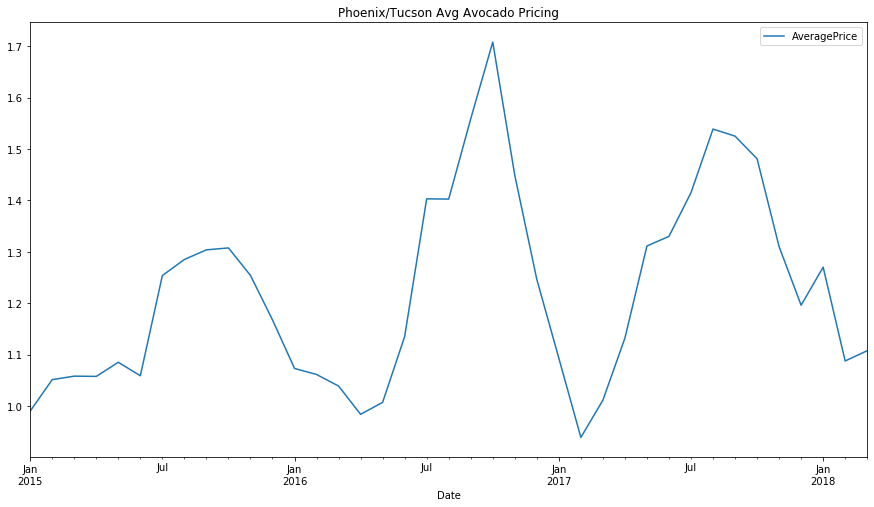

In [45]:
monthly_PT_avg.plot( figsize=(15, 8), title='Phoenix/Tucson Avg Avocado Pricing');

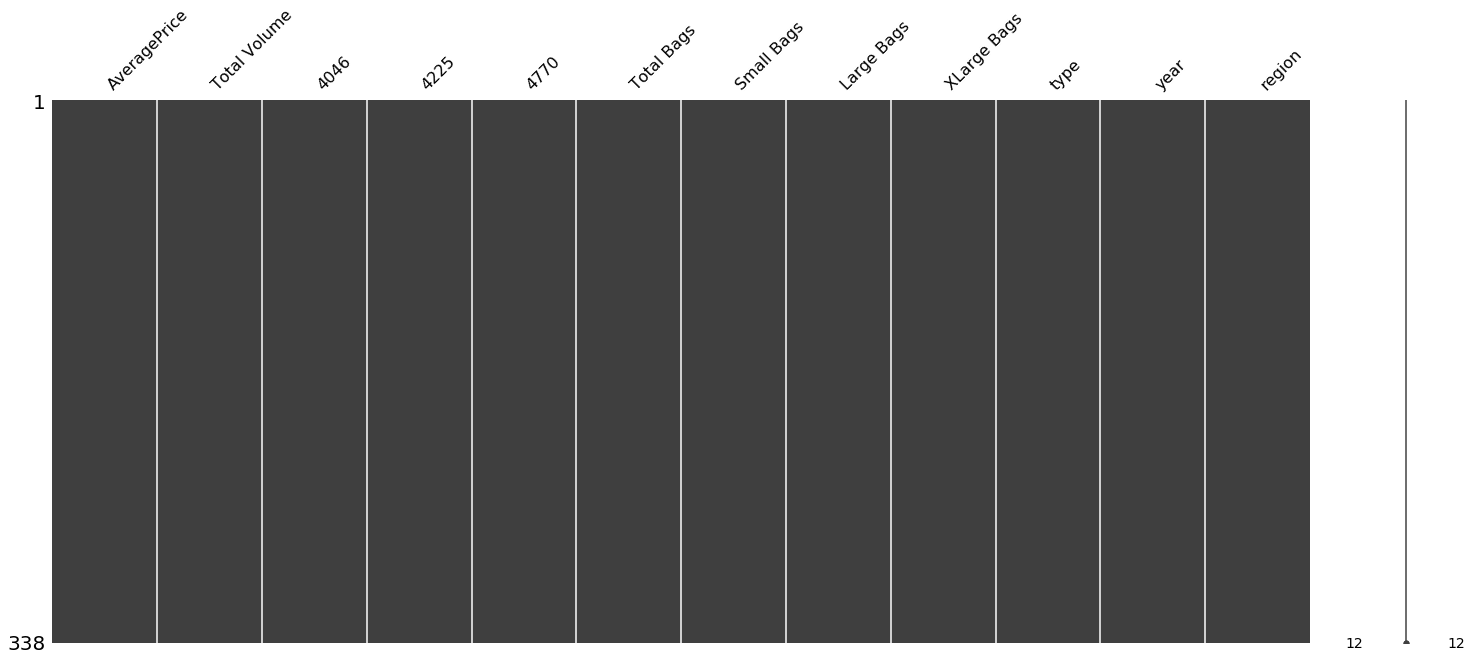

In [51]:
mno.matrix(PhoenixTucson)

In [56]:
NorthernNE.to_pickle('avocado_pickle_NNE')

In [57]:
PhoenixTucson.to_pickle('avocado_pickle_PT')